In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import viz # curriculum viz example code

# Problem 1
## A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

- What is the probability that no cars drive up in the noon hour?
- What is the probability that 3 or more cars come through the drive through?
- How likely is it that the drive through gets at least 1 car?

In [103]:
stats.poisson(2).pmf(0) * 100

13.53352832366127

In [100]:
nrows = 100000
ncols = 1

rolls = np.random.poisson(2, nrows * ncols).reshape(nrows, ncols)
df = pd.DataFrame(rolls)
df.head()

,0
0,1
1,1
2,5
3,1
4,2


In [101]:
df['zero_cars'] = df[0] == 0
df.head()

,0,zero_cars
0,1,False
1,1,False
2,5,False
3,1,False
4,2,False


In [102]:
df.zero_cars.mean() * 100

13.497

In [110]:
stats.poisson(2).sf(3) * 100

14.287653950145296

In [5]:
stats.poisson(2).sf(0) * 100

86.46647167633873

In [107]:
nrows = 100000
ncols = 1

rolls = np.random.poisson(2, nrows * ncols).reshape(nrows, ncols)
df = pd.DataFrame(rolls)

df['three_cars'] = df[0] >= 3
df.head()

,0,three_cars
0,2,False
1,0,False
2,1,False
3,5,True
4,4,True


In [109]:
df.three_cars.mean()* 100

32.144

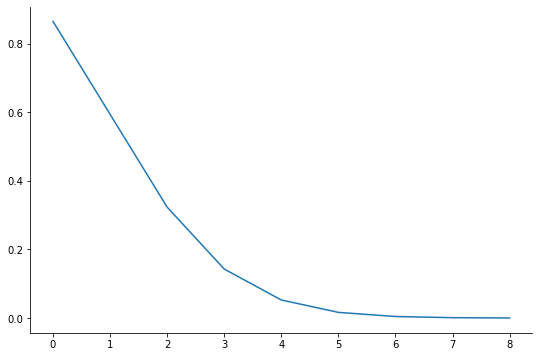

In [6]:
x = range(0,9)
y = stats.poisson.sf(x, mu=2)
plt.plot(x, y)

# Problem 2
## Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

- What grade point average is required to be in the top 5% of the graduating class?
- What GPA constitutes the bottom 15% of the class?
- An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?
- If I have a GPA of 3.5, what percentile am I in?

In [7]:
stats.norm(3.0, .3).isf(.05)

3.4934560880854417

In [8]:
stats.norm(3.0, .3).ppf(.15)

2.689069983151863

In [112]:
stats.norm(3.0, .3).ppf(.2) #range lower

2.7475136299281258

In [111]:
stats.norm(3.0, .3).ppf(.3) #range higher

2.842679846187588

In [11]:
stats.norm(3.0, .3).cdf(2.8) #Yes, in the bottom 25%

0.2524925375469227

In [12]:
stats.norm(3.0, .3).cdf(3.5) * 100

95.22096477271853

# Problem 3
## A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [113]:
stats.binom(4326, .02).sf(97 - 1) *100

13.97582363130086

# Problem 4
## You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

In [114]:
stats.binom(60, 1/100).sf(0) *100 

45.28433576092388

# Problem 5
## The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?

In [115]:
stats.binom((.90 * 66), .03).sf(0) *100

83.42199288437355

In [16]:
stats.binom((.90 * 66) * 2, .03).pmf(0) *100

2.68214363016291

In [116]:
stats.binom((.90 * 66) * 5, .03).pmf(0) *100

0.011781621791055167

# Problem 6
## You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [118]:
cust = 15
sd_cust = 3
time_order = 2
get_food = 10
eat_food = 15

line = 60 - get_food - eat_food

line / time_order

17.5

In [119]:
stats.norm(15, 3).cdf(17.5) *100

79.76716190363568

# Problem 7
## Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.
- What percent of employees earn less than 60,000?
- What percent of employees earn more than 95,000?
- What percent of employees earn between 65,000 and 80,000?
- What do the top 5% of employees make?

In [19]:
import numpy as np
import pandas as pd
from env import host, user, password

def get_db_url(host = host, user = user, password = password, db = 'employees'):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [20]:
sql = '''
SELECT salary
FROM salaries
WHERE to_date >=NOW()
'''

salaries = pd.read_sql(sql, get_db_url())

In [21]:
sal_std = salaries.salary.std()
sal_mean = salaries.salary.mean()

sal_dist = stats.norm(sal_mean, sal_std)

In [22]:
sal_dist.cdf(60000) * 100 #Estimated

24.38574248021442

In [23]:
(salaries.salary < 60000).mean() * 100 #Actual

27.05727041028802

In [24]:
sal_dist.sf(95000)* 100 #Estimated

9.208819199804053

In [25]:
(salaries.salary > 95000).mean() *100 #Actual

10.86272092752078

In [26]:
(sal_dist.cdf(80000) - sal_dist.cdf(65000)) * 100 #Estimated

33.50605685446666

In [27]:
((salaries.salary > 65000) & (salaries.salary <80000)).mean() * 100 #Actual

32.5107028035515

In [28]:
sal_dist.isf(.05) #Estimated

100484.64454102777

In [29]:
salaries.quantile(.95) #Actual

salary    104225.85
Name: 0.95, dtype: float64

# Sandbox

In [69]:

y = stats.norm(3_000, 100)

df = pd.DataFrame(columns = {'nums'}, data = y.rvs(100))
df.head()

,nums
0,2873.119010
1,3052.930848
2,3078.996087
3,2813.654158
4,2974.511873


In [81]:
df['top_decile'] = df.nums > (df.nums.max() * .90)

In [82]:
df.nums.max()* .90

2948.799083132333

In [90]:
df.top_decile.mean()

0.71